# Risk Analysis of the Space Shuttle: Pre-Challenger Prediction of Failure

In this document we reperform some of the analysis provided in 
*Risk Analysis of the Space Shuttle: Pre-Challenger Prediction of Failure* by *Siddhartha R. Dalal, Edward B. Fowlkes, Bruce Hoadley* published in *Journal of the American Statistical Association*, Vol. 84, No. 408 (Dec., 1989), pp. 945-957 and available at http://www.jstor.org/stable/2290069. 

On the fourth page of this article, they indicate that the maximum likelihood estimates of the logistic regression using only temperature are: $\hat{\alpha}$ = **5.085** and $\hat{\beta}$ = **-0.1156** and their asymptotic standard errors are $s_{\hat{\alpha}}$ = **3.052** and $s_{\hat{\beta}}$ = **0.047**. The Goodness of fit indicated for this model was $G^2$ = **18.086** with **21** degrees of freedom. Our goal is to reproduce the computation behind these values and the Figure 4 of this article, possibly in a nicer looking way.

## Technical information on the computer on which the analysis is run

We will be using the Python 3 language using the pandas, statsmodels, and numpy library.

In [2]:
def print_imported_modules():
    import sys
    for name, val in sorted(sys.modules.items()):
        if(hasattr(val, '__version__')): 
            print(val.__name__, val.__version__)
#        else:
#            print(val.__name__, "(unknown version)")
def print_sys_info():
    import sys
    import platform
    print(sys.version)
    print(platform.uname())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

print_sys_info()
print_imported_modules()

3.7.0 (v3.7.0:1bf9cc5093, Jun 27 2018, 04:59:51) [MSC v.1914 64 bit (AMD64)]
uname_result(system='Windows', node='MGDONDON', release='7', version='6.1.7601', machine='AMD64', processor='Intel64 Family 6 Model 94 Stepping 3, GenuineIntel')
IPython 6.5.0
IPython.core.release 6.5.0
_csv 1.0
_ctypes 1.1.0
decimal 1.70
argparse 1.1
backcall 0.1.0
colorama 0.3.9
csv 1.0
ctypes 1.1.0
cycler 0.10.0
dateutil 2.7.3
decimal 1.70
decorator 4.3.0
distutils 3.7.0
ipykernel 4.8.2
ipykernel._version 4.8.2
ipython_genutils 0.2.0
ipython_genutils._version 0.2.0
ipywidgets 7.4.0
ipywidgets._version 7.4.0
jedi 0.12.1
json 2.0.9
jupyter_client 5.2.3
jupyter_client._version 5.2.3
jupyter_core 4.4.0
jupyter_core.version 4.4.0
kiwisolver 1.0.1
logging 0.5.1.2
matplotlib 2.2.3
matplotlib.backends.backend_agg 2.2.3
numpy 1.15.4
numpy.core 1.15.4
numpy.core.multiarray 3.1
numpy.lib 1.15.4
numpy.linalg._umath_linalg b'0.1.5'
numpy.matlib 1.15.4
pandas 0.23.4
_libjson 1.33
parso 0.3.1
patsy 0.5.0
patsy.version 0.5

## Loading and inspecting data
Let's start by reading data.

In [3]:
data = pd.read_csv("https://app-learninglab.inria.fr/moocrr/gitlab/moocrr-session3/moocrr-reproducibility-study/blob/master/data/data/shuttle.csv")
data

Date  Count  Temperature  Pressure  Malfunction
0     4/12/81      6           66        50            0
1    11/12/81      6           70        50            1
2     3/22/82      6           69        50            0
3    11/11/82      6           68        50            0
4     4/04/83      6           67        50            0
5     6/18/82      6           72        50            0
6     8/30/83      6           73       100            0
7    11/28/83      6           70       100            0
8     2/03/84      6           57       200            1
9     4/06/84      6           63       200            1
10    8/30/84      6           70       200            1
11   10/05/84      6           78       200            0
12   11/08/84      6           67       200            0
13    1/24/85      6           53       200            2
14    4/12/85      6           67       200            0
15    4/29/85      6           75       200            0
16    6/17/85      6           70       200            0
17  7/2903/85      6           81       200            0
18    8/27/85      6           76       200            0
19   10/03/85      6           79       200            0
20   10/30/85      6           75       200            2
21   11/26/85      6           76       200            0
22    1/12/86      6           58       200            1

We know from our previous experience on this data set that filtering data is a really bad idea. We will therefore process it as such.

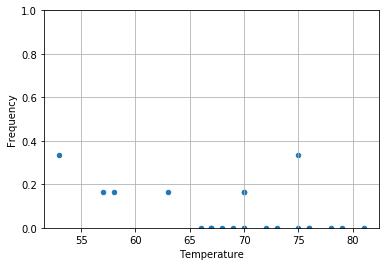

In [4]:
%matplotlib inline
pd.set_option('mode.chained_assignment',None) # this removes a useless warning from pandas
import matplotlib.pyplot as plt

data["Frequency"]=data.Malfunction/data.Count
data.plot(x="Temperature",y="Frequency",kind="scatter",ylim=[0,1])
plt.grid(True)

## Logistic regression

Let's assume O-rings independently fail with the same probability which solely depends on temperature. A logistic regression should allow us to estimate the influence of temperature.

In [5]:
import statsmodels.api as sm

data["Success"]=data.Count-data.Malfunction
data["Intercept"]=1

logmodel=sm.GLM(data['Frequency'], data[['Intercept','Temperature']], 
                family=sm.families.Binomial(sm.families.links.logit)).fit()

logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Frequency   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3.9210
Date:                Mon, 12 Nov 2018   Deviance:                       3.0144
Time:                        21:08:43   Pearson chi2:                     5.00
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0850      7.477      0.680      0.496      -9.570      19.740
Temperature    -0.1156      0.115     -1.004      0.316      -0.341       0.110
===============================================================================
"""

The maximum likelyhood estimator of the intercept and of Temperature are thus $\hat{\alpha}$ = **5.0850** and $\hat{\beta}$ = **-0.1156**. This **corresponds** to the values from the article of Dalal *et al.* The standard errors are $s_{\hat{\alpha}}$ = ***7.477*** and $s_{\hat{\beta}}$ = ***0.115***, which is **different** from the **3.052** and **0.04702** reported by Dallal *et al.* The deviance is ***3.01444*** with **21** degrees of freedom. I cannot find any value similar to the Goodness of fit ($G^2$ = **18.086**) reported by Dalal *et al.* There seems to be something wrong. Oh I know, I haven't indicated that my observations are actually the result of 6 observations for each rocket launch. Let's indicate these weights (since the weights are always the same throughout all experiments, it does not change the estimates of the fit but it does influence the variance estimates).

In [6]:
logmodel=sm.GLM(data['Frequency'], data[['Intercept','Temperature']], 
                family=sm.families.Binomial(sm.families.links.logit),
                var_weights=data['Count']).fit()

logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Frequency   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23.526
Date:                Mon, 12 Nov 2018   Deviance:                       18.086
Time:                        21:08:47   Pearson chi2:                     30.0
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0850      3.052      1.666      0.096      -0.898      11.068
Temperature    -0.1156      0.047     -2.458      0.014      -0.208      -0.023
===============================================================================
"""

Good, now I have recovered the asymptotic standard errors $s_{\hat{\alpha}}$ = **3.052** and $s_{\hat{\beta}}$ = **0.047**.
The Goodness of fit (Deviance) indicated for this model is $G^2$ = **18.086** with **21** degrees of freedom (Df Residuals).

**I have therefore managed to fully replicate the results of the Dalal *et al.* article**.

## Predicting failure probability
The temperature when launching the shuttle was 31°F. Let's try to estimate the failure probability for such temperature using our model:

In [7]:
data_pred = pd.DataFrame({'Temperature': np.linspace(start=30, stop=90, num=121),
                          'Intercept': 1})
data_pred['Frequency'] = logmodel.predict(data_pred)
print(data_pred.head())

   Temperature  Intercept  Frequency
0         30.0          1        1.0
1         30.5          1        1.0
2         31.0          1        1.0
3         31.5          1        1.0
4         32.0          1        1.0


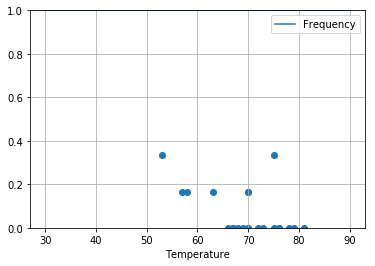

In [8]:
%matplotlib inline
data_pred.plot(x="Temperature",y="Frequency",kind="line",ylim=[0,1])
plt.scatter(x=data["Temperature"],y=data["Frequency"])
plt.grid(True)

La fonction `logmodel.predict(data_pred)` ne fonctionne pas avec les dernières versions de pandas (`Frequency = 1` pour toutes les températures).

On peut alors utiliser le code suivant pour calculer les prédictions et tracer la courbe :

In [9]:
# Inspiring from http://blog.yhat.com/posts/logistic-regression-and-python.html
def logit_inv(x):
    return(np.exp(x)/(np.exp(x)+1))

data_pred['Prob']=logit_inv(data_pred['Temperature'] * logmodel.params['Temperature'] + 
                            logmodel.params['Intercept'])
print(data_pred.head())

   Temperature  Intercept  Frequency      Prob
0         30.0          1        1.0  0.834373
1         30.5          1        1.0  0.826230
2         31.0          1        1.0  0.817774
3         31.5          1        1.0  0.809002
4         32.0          1        1.0  0.799911


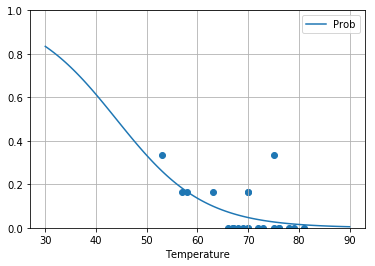

In [11]:
%matplotlib inline
data_pred.plot(x="Temperature",y="Prob",kind="line",ylim=[0,1])
plt.scatter(x=data["Temperature"],y=data["Frequency"])
plt.grid(True)

This figure is very similar to the Figure 4 of Dalal *et al.* **I have managed to replicate the Figure 4 of the Dalal *et al.* article.**

## Computing and plotting uncertainty

Following the documentation of [Seaborn](https://seaborn.pydata.org/generated/seaborn.regplot.html), I use regplot.

c:\program files\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


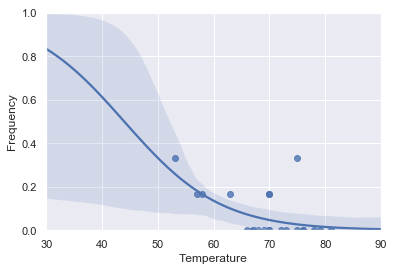

In [12]:
%matplotlib inline
sns.set(color_codes=True)
plt.xlim(30,90)
plt.ylim(0,1)
sns.regplot(x='Temperature', y='Frequency', data=data, logistic=True)
plt.show()

**I think I have managed to correctly compute and plot the uncertainty of my prediction.** Although the shaded area seems very similar to [the one obtained by with R](https://app-learninglab.inria.fr/moocrr/gitlab/moocrr-session3/moocrr-reproducibility-study/tree/master/challenger.pdf), I can spot a few differences (e.g., the blue point for temperature 63 is outside)... Could this be a numerical error ? Or a difference in the statistical method ? It is not clear which one is "right".